Creator:<br>
Alexander Levin-Koopman<br>
email:<br>
alex.levinkoopman85@gmail.com

## Visualization Technique
For this demonstration I will be using the jointplot and the backbone of it the JointGrid from the seaborn library.<br>
This plotting technique is a way to see the interaction between two continuous variables. The grid is split into three sections, the joint plot which is in the center and the marginal plots, one of which is on top and the other which is on the right side. The joint plot shows the interaction of the variables, and the marginal plots show the distributions. Using The jointplot we can quickly graph a scatterplot and also see the histograms of those variables in the joint and marginal plots respectively. We can specify different plot types in the jointplot, but once we select the type we want to use in the joint plot we are locked into the choice for the marginal plots. To overcome this, we can use the JointGrid instead. The jointplot is built on top of the JointGrid, using the latter gives us more control but is a bit more involved. "This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly."(Seaborn.jointplot — Seaborn 0.11.1 Documentation)<br>
<br>
Plotting with the jointplot and JointGrid interface is a great way to see bivariate data as well as each univariate distribution on the same figure. These techniques can be used with any bivariate and continuous data. Just like a scatter plot we can see the relationship between the variables, and we can even specify a regression plot to fit a regression line. Although this technically works with categorical data and we can make barplots in the JointGrid, at least one of the marginal plots won't make sense and it would be better visualized using another plotting function. This can be seen in Example 9.	

## Visulaization library
The seaborn Library is an open source statistical plotting library derived from matplotlib. It is more intuitive and makes quick plotting easy with nice looking default values. Seaborn has a quick and easy way to create this jointplot, which is technically possible to create in matplotlib's pyplot, but it would take a lot of code and testing to get right. Using seaborn to create the jointplot has its limitations. With many of the seaborn functions they can take a matplotlib axis as an argument and most also return that axis for further customization. This is not the case with jointplot. It is built on top of the JointGrid and has access to the axis objects created from the jointgrid for customization but no axis or figure objects can be passed to JointGrid initially. Unlike matplotlib's pyplot, seaborn is declarative not procedural. As stated in the seaborn introduction "Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them"(An Introduction to Seaborn — Seaborn 0.9.0 Documentation). The Seaborn library was created by Michael Waskom and can be integrated wherever matplotlib can be which creates a very diverse array of environments where it can be used including the jupyter environment without any alteration.
### Installation
`pip install seaborn`<br>
or<br>
`conda install seaborn`
### Dependencies
`numpy`<br>
`scipy`<br>
`pandas`<br>
`matplotlib`
### Optional Dependencies
`statsmodels`<br>
`fastcluster`<br>
(Seaborn.jointplot — Seaborn 0.11.1 Documentation)

## Visualization demonstration
For this demonstration I am going to use one of the built-in datasets from the seaborn library. Specifically, the miles per gallon (mpg.csv) dataset. it can be retrieved by `seaborn.load_dataset('mpg')` or by going to https://github.com/mwaskom/seaborn-data.

### Import and data cleaning

In [1]:
# first we import our modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set the pandas DataFrame to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# Load The data, it is from seaborn datasets
data = sns.load_dataset('mpg')
# drop any rows with null values
data.dropna(inplace=True)
# lets look at a the shape and a sample of the data
print('Shape of the dataframe')
print(f'{data.shape[0]} rows')
print(f'{data.shape[1]} columns\n')
print(data.info())
print("\nSample from the DataFrame")
data.sample(5)

Shape of the dataframe
392 rows
9 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB
None

Sample from the DataFrame


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
151,31.0,4,79.0,67.0,2000,16.0,74,europe,fiat x1.9
106,12.0,8,350.0,180.0,4499,12.5,73,usa,oldsmobile vista cruiser
357,32.9,4,119.0,100.0,2615,14.8,81,japan,datsun 200sx
305,28.4,4,151.0,90.0,2670,16.0,79,usa,buick skylark limited
345,35.1,4,81.0,60.0,1760,16.1,81,japan,honda civic 1300


### Plotting
#### Example 1
To create a simple jointplot we specify the data we are working with and the variables to assign to x and y. Seaborn will create a plot with axis labels and does a good job of picking default values including axis labels, tick marks, color, etc.

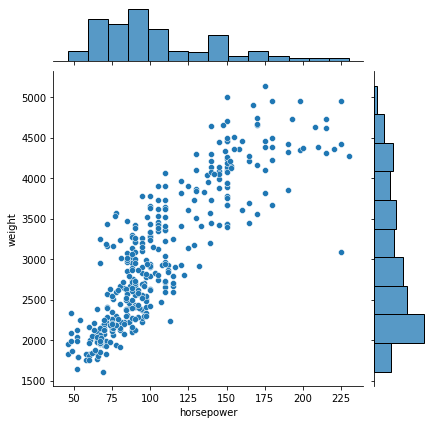

In [4]:
sns.jointplot(data=data, x='horsepower', y='weight')

#### Example 2
We can specify a plot `kind` and the jointplot automatically picks appropriate values and changes the marginal plots appropriately. there are many types of plots that can be used. The built-in ones are scatter, regression, kde, histogram, hex, and residual.

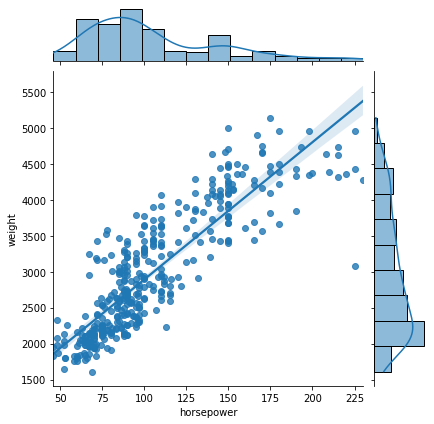

In [5]:
# specify that we are using a regression plot
sns.jointplot(data=data, x='horsepower', y='weight', kind='reg')

#### Example 3

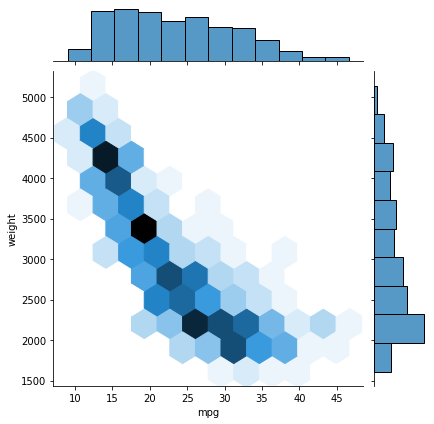

In [6]:
# here we see the hex plot kind
sns.jointplot(data=data, x='mpg', y='weight', kind='hex')

#### Example 4
The Residual plot shows the distribution of the residuals if we were predicting mpg from horsepower. The plot fits a model and plots the residuals.

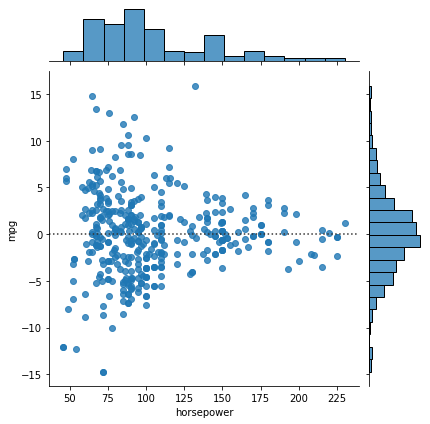

In [7]:
# to show the residual plot it will take x as the predictor variable and y as the response variabel
sns.jointplot(data=data, x='horsepower', y='mpg', kind='resid', order=2)
# here we had to specify an order parameter it is the order of the
# polynomial fit to determin the residuals where 1 in a linear fit
# this relationship can be seen in Example 5

#### Example 5
To see the interaction of a third variable we can specify a hue. A legend will appear, and the marginal plots will again change accordingly. We can control for the height of the figure, though it will always be square.

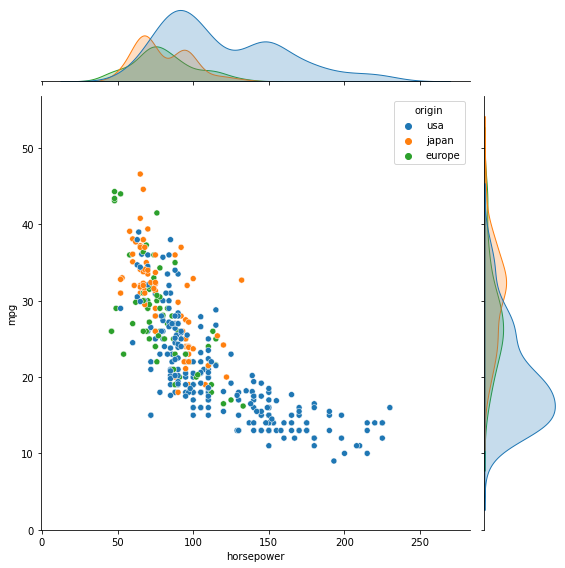

In [8]:
# adding in a hue and height variable
sns.jointplot(data=data, x='horsepower', y='mpg', hue='origin', height=8)

#### Example 6
Although the default values look nice in many cases, sometimes we want to do some kind of customization. We can send optional arguments to the individual plots, either the joint plot or the marginal plots. These optional keyword arguments are passed to the underlying functions so they will change depending on the `kind` specified.

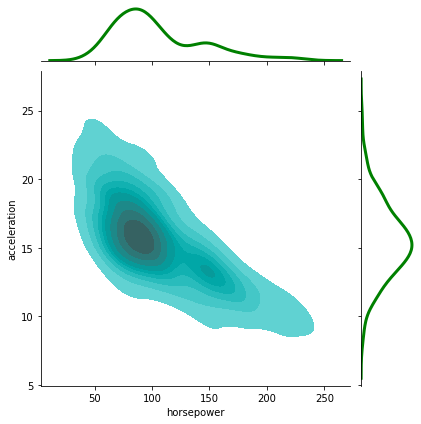

In [9]:
sns.jointplot(data=data, x='horsepower', y='acceleration', kind='kde', 
              joint_kws=dict(fill=True, color='cyan'), 
              marginal_kws=dict(color='green', fill=False, linewidth=3))

#### Example 7
The jointplot function returns a JointGrid object so we can use its methods to do some additional plotting to combine plot types.

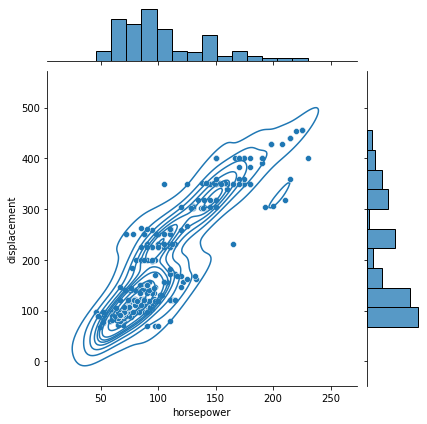

In [10]:
# a seaborn kdeplot ontop of a scatterplot of the same data
# here i only specified the jointplot so the kdeplot is only represented there
# and the marginal plots are unchanged
grid = sns.jointplot(data=data, x='horsepower', y='displacement')
grid.plot_joint(sns.kdeplot)

#### Example 8
Using the jointplot is extremely easy and intuitive, but for greater control and more plotting options we can use the JointGrid directly. The JointGrid takes many of the same parameters as jointplot but here there are not optional argument parameters for the individual plots. They must be specified when calling one of the plot functions.

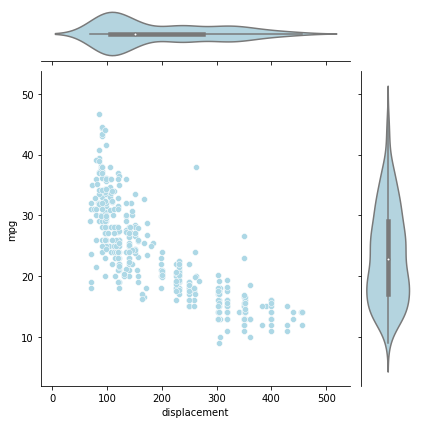

In [11]:
# Here we are using a seaborn scatterplot as the jointplot
# and seaborn violinplots for the marginal plots.
# the color parameter is optional and effects both
grid = sns.JointGrid(data=data, x='displacement', y='mpg')
grid.plot(sns.scatterplot, sns.violinplot, color='lightblue')

#### Example 9
This is an example of why categorical data does not work as well. The barplot itself turns out fine and the marginal plot on the right is fine as well, however the top marginal plot is quite meaningless. Since the individual plots cannot be turned off we are better off visualizing the categorical data in another plot type. Or as we will see in example 12 we can use the underlying matplotlib axis to plot or not.

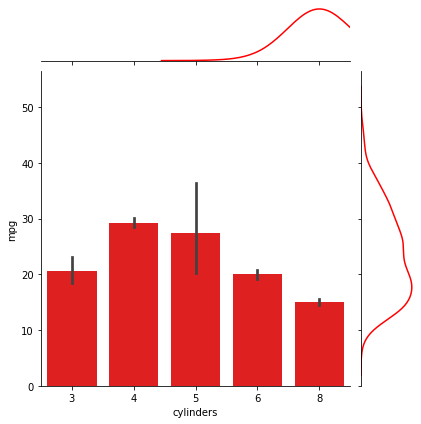

In [12]:
# not ideal for categorical data
grid = sns.JointGrid(data=data, x='cylinders', y='mpg')
grid.plot(sns.barplot, sns.kdeplot, color='red')

#### Example 10
We are not bound by the seaborn library for plot types. We can also use matplotlib.pyplot functions if we so choose.

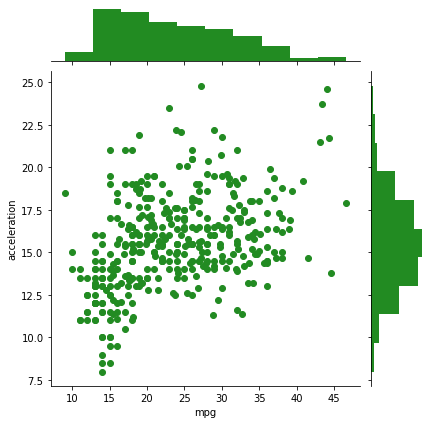

In [13]:
# we can also use matplotlib's pyplot functions to plot
grid = sns.JointGrid(data=data, x='mpg', y='acceleration')
grid.plot(plt.scatter, plt.hist, color='forestgreen')
# as an asside for the marginal plots i was not able to get 
# pyplot's boxplot violinplot or plot functions to work.
# It threw an error that 'orient_kw_x' was used before it was 
# declared. It also could not be passed through by Jointgrid.plot
# this may work if we use the technique seen in example 12

#### Example 11
We can plot the joint and marginal plots separately passing different keyword arguments to each to customize them even more or if there are conflicting parameters to pass to the joint and marginal plots. (fill the joint kde but don’t fill the marginal ones). We can also do some label customization. Seaborn is also great for the vast array of color pallets to choose from to avoid picking individual colors.<br>
<br>
There is a great article here https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f that shows an example of each color pallet.

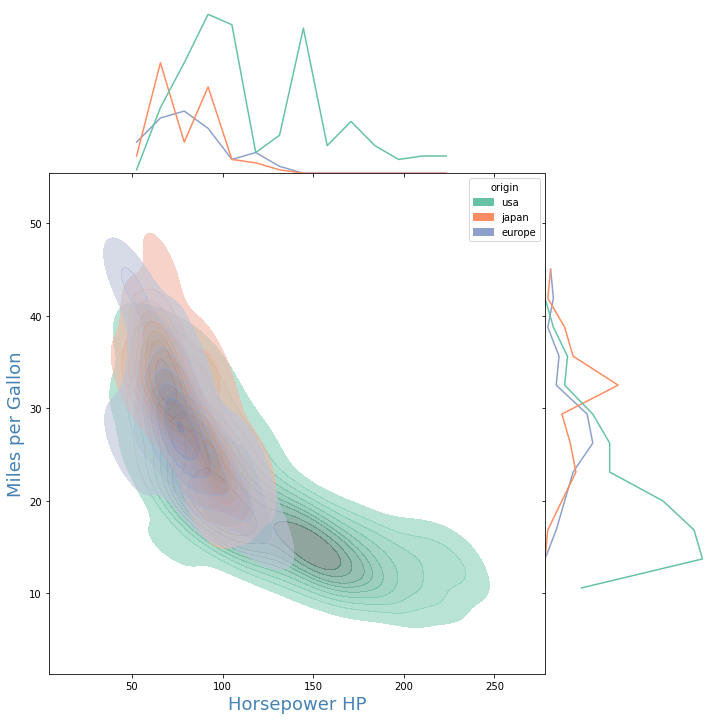

In [14]:
# plot individually then customize axis labels
grid = sns.JointGrid(data=data, x='horsepower', y='mpg', hue='origin', space=0, height=10, ratio=3, palette='Set2')
grid.plot_joint(sns.kdeplot, fill=True, alpha=.6)
grid.plot_marginals(sns.histplot, element='poly', linewidth=1.5, fill=False)
grid.set_axis_labels(xlabel='Horsepower HP', ylabel='Miles per Gallon', fontsize=18, color='steelblue')

#### Example 12
Finally we can access the individual matplotlib axis variables for even more controle. They can be used for customization after the initial plotting or by using the matplotlib plotting functions them selves. Aditionally we can take the axis and pass them into a seaborn plotting function. however when we are plottingthis way we must make sure that our plotting is consistent. we can easily switch the marginal plots showing the wrong distribution on them as compared to the joint plot.

Text(0.5, 1.06, 'Comparing miles per gallon and acceleration')

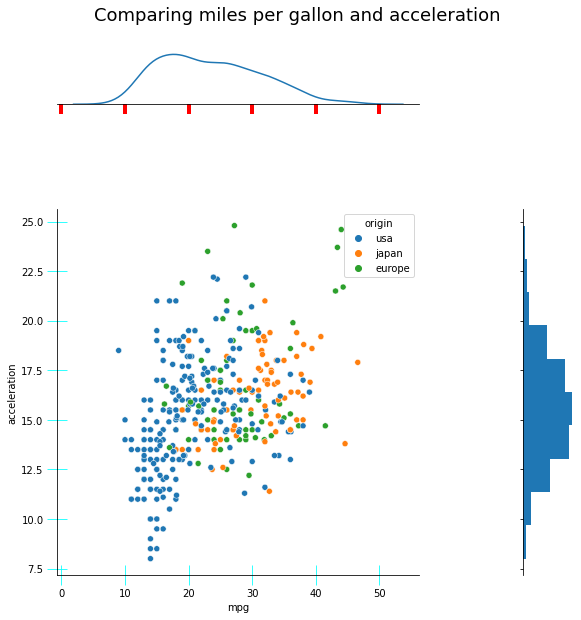

In [15]:
grid = sns.JointGrid(data=data, x='mpg', y='acceleration', hue='origin', space=2, height=8, ratio=3)
# plotting on the jont grid normally
grid.plot_joint(sns.scatterplot)
# using the matplotlib axis to set the tick params
grid.ax_joint.tick_params(axis='both', direction='inout', length=20, color='cyan')
# plotting from the matplotlib axis this must correspond to the data plotted on the y axis in the joint plot
grid.ax_marg_y.hist(data['acceleration'], orientation='horizontal')
# passing the matplotlib axis to a seaborn plotting function
# again this must correspond to the data plotted on the x axis in the joint plot
sns.kdeplot(data=data, x='mpg', legend=False, ax=grid.ax_marg_x)
# adjusting the x marginal plot tick params
grid.ax_marg_x.tick_params(axis='x', color='red', width=4, length=10)
# accessing the figure to add a title
grid.fig.suptitle('Comparing miles per gallon and acceleration', y=1.06, fontsize=18)

## Conclusion
Although there are limitations to the seaborn jointplot and JointGrid they are extremely useful in creating quick, good looking and informative plots of this type. They can create powerful visualizations and inform on the interaction of the variables and the distributions of those variables at the same time. There is potential for all this customization to get confusing and can greatly skew the data ink ratio defined by Tufte making some of these visualizations hard to follow.

### Sources

“Seaborn.jointplot — Seaborn 0.11.1 Documentation.” Seaborn.pydata.org,<br>
seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot.<br>
Accessed 22 Mar. 2021.<br>

“An Introduction to Seaborn — Seaborn 0.9.0 Documentation.” Pydata.org,<br>
2012, seaborn.pydata.org/introduction.html.<br>
Accessed 22 Mar. 2021.<br>

‌“Installing and Getting Started — Seaborn 0.11.1 Documentation.”<br>
Seaborn.pydata.org, seaborn.pydata.org/installing.html.<br>
Accessed 22 Mar. 2021.
‌

### Documentation


In [16]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.9.2
IPython version      : 7.21.0

numpy     : 1.20.1
pandas    : 1.2.2
matplotlib: 3.3.4
seaborn   : 0.11.1

